# 线性回归模型 – 房价预测

针对**线性回归**模型，我们将讨论两种截然不同的方法来训练它：

* 使用直接“闭合形式”方程，正规方程（The Normal Equation），该方程直接计算最适合训练集的模型参数（即，最小化训练集上cost function（成本函数）的模型参数）。

* 使用称为梯度下降（GD）的迭代优化方法，逐步调整模型参数以最小化在训练集上成本函数，最终收敛到与第一种方法相同的参数集。

我们将研究一些梯度下降（GD）的变体，当我们研究神经网络时，我们将一次又一次地使用它们：**Batch GD，Mini-batch GD和Stochastic GD**。

## 环境构建

In [1]:
# To support both python 2 and python 3
# 让这份笔记同步支持 python 2 和 python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
# 让笔记全程输入稳定
np.random.seed(42)

# To plot pretty figures
# 导入绘图工具
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
# 设定图片保存路径，这里写了一个函数，后面直接调用即可
PROJECT_ROOT_DIR = os.path.abspath('.')   # 表示当前所处的文件夹的绝对路径
CHAPTER_ID = "Linear Regression"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
print(IMAGES_PATH)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
# 忽略无用警告
import warnings
#warnings.filterwarnings(action="ignore", message="^internal gelsd")
warnings.filterwarnings(action="ignore")

/home/ds/notebooks/Linear_Regression_house_price/images/Linear Regression


## 线性回归
* 线性模型通过简单地计算输入要素的加权和以及称为偏差项的常数（也称为截距项）来进行预测
* 训练模型意味着设置其参数，以使模型最适合训练集
* 回归模型最常见的性能指标是**均方根误差（RMSE）**。回归模型比分类模型更容易评估模型的好坏，如果训练目标和评估目标一致，那么最好。因此，要训练线性回归模型，您需要找到最小化RMSE的θ值。 在实践中，最小化**均方误差（MSE）**比RMSE更简单，因为他们会有相同的结果。


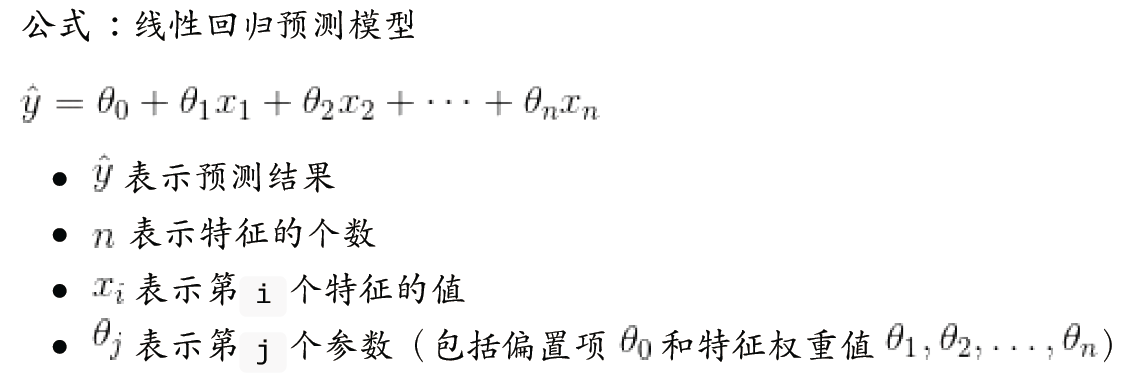

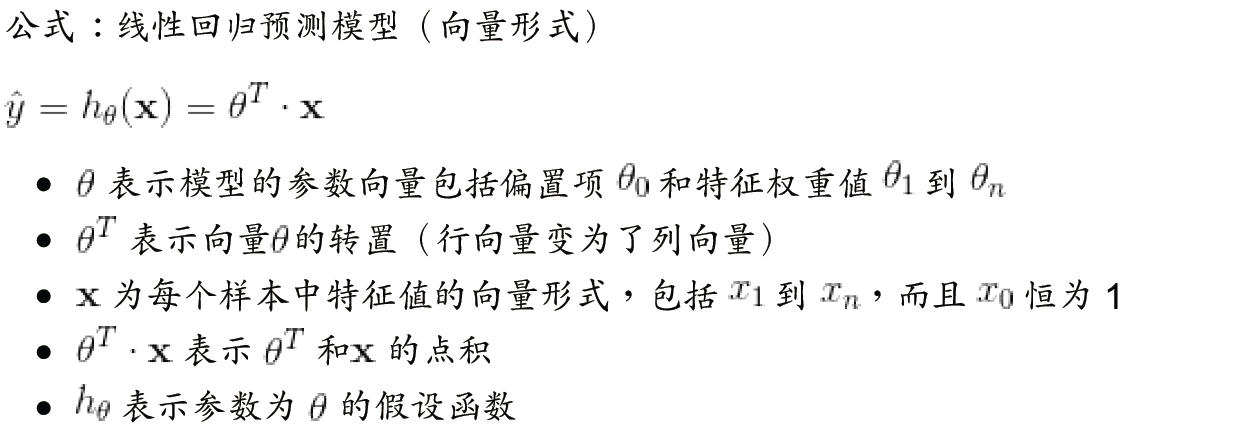

在训练集$X$上使用下式来计算线性回归假设$h_\theta$的均方差(MSE)

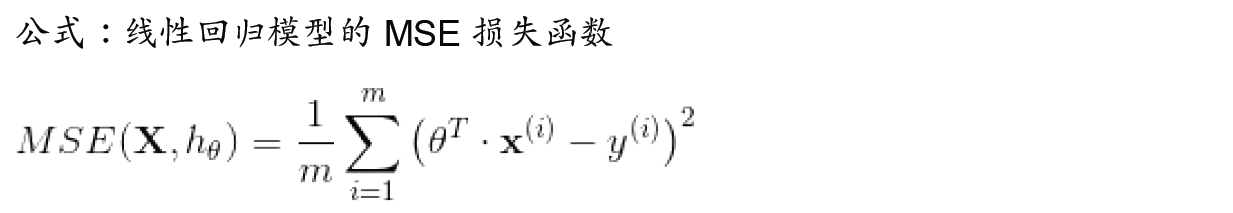

## 正规方程（The Normal Equation）

为了找到最小化成本函数的θ值，有一种封闭形式的解决方案- 换句话说，一个直接给出结果的数学方程式。 这就是所谓的正规方程。
也称之为：线性回归模型的最小二乘“参数估计”(parameter estimation)，推导过程如下：  
$$MSE(X,h_\theta) = {{1}\over{m}}\sum_{i=1}^m(\theta^T{\cdot}X^{(i)}-y^{(i)})^2 = (X\theta-y)^T(X\theta-y)$$
$$MSE(X,h_\theta) = (\theta^TX^T-y^T)(X\theta-y) = (\theta^TX^TX\theta-2\theta^TX^Ty+y^Ty)$$
$${{\partial{MSE(X,h_\theta)}}\over{\partial\theta}} = 2X^TX\theta-2X^Ty=0$$
$$\hat\theta = (X^TX)^{-1}X^Ty$$
* $\hat\theta$是指最小化损失$\theta$的值  
* $y$是指一个向量，其中包含了$y^{(1)}$到$y^{(m)}$的值


让我们生成一些线性数据来测试这个等式：

In [2]:
import numpy as np

X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)

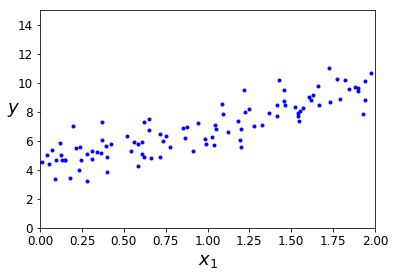

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

现在让我们使用Normal Equation计算$\hat{θ}$。我们将使用NumPy的线性代数模块（**np.linalg**）中的**inv（）函数**来计算矩阵的逆，以及用于矩阵乘法的**dot（）函数**：

In [4]:
X_b=np.c_[np.ones((100,1)),X]  # add x0 = 1 to each instance，theta0*x0
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

我们用于生成数据的实际函数是$y = 4 + 3x_0 +高斯噪声( y = 4 + 3x_0 + Gaussian noise)$，让我们看看等式找到了什么：

In [5]:
theta_best

array([[4.21509616],
       [2.77011339]])

我们希望$θ_0= 4$且$θ_1= 3$而不是$θ_0= 4.21$且$θ_1= 2.77$。 足够接近，但噪音使得无法恢复原始函数的确切参数。

现在我们可以使用$\hat{θ}$进行预测，预测x分别等于0和2的两个点对应的y值：

In [6]:
X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new] # add x0=1 to each instance，加偏置
print(X_new_b)
y_predict=X_new_b.dot(theta_best)
y_predict

[[1. 0.]
 [1. 2.]]


array([[4.21509616],
       [9.75532293]])

<function matplotlib.pyplot.show>

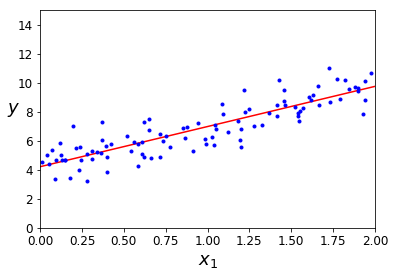

In [7]:
plt.plot(X_new,y_predict,"r-") #两点间连线
plt.plot(X,y,"b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])
plt.show

使用Scikit-Learn的等效代码如下所示:

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

## 梯度下降（Gradient Descent）

**梯度下降**是一种非常通用的优化算法，能够找到解决各种问题的最佳解决方案。 Gradient Descent的一般思想是：**迭代调整参数以最小化成本函数**。

假设你在浓雾中迷失在山里;你只能感觉到脚下的地面坡度。快速到达山谷底部的一个好策略是沿最陡坡的方向下坡。这正是Gradient Descent所做的：它测量**误差函数**关于参数向量θ的局部梯度，并且它沿着下降梯度的方向。一旦梯度为零，您就达到了最低限度！

具体地说，你：
* 首先用随机值填充θ（这称为随机初始化）
* 然后你逐步改进它，每次迈出一步，每一步试图降低成本函数（例如，MSE），直到算法收敛到最小值。

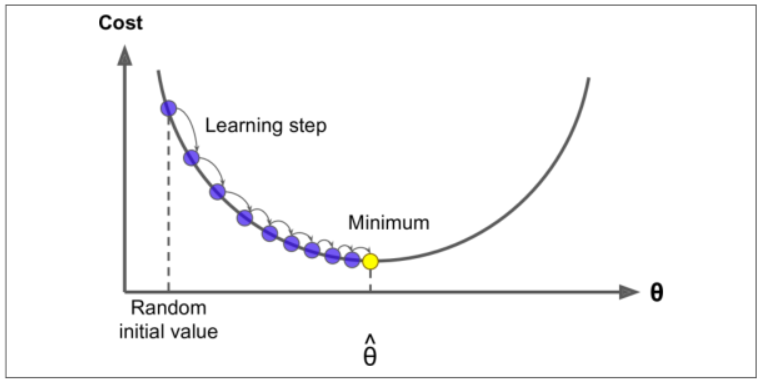

Gradient Descent中的一个重要参数是**步长的大小**，由**学习速率超参数(什么叫超参)**确定。 如果学习速率太小，那么算法将不得不经历多次迭代以收敛，这将花费很长时间。

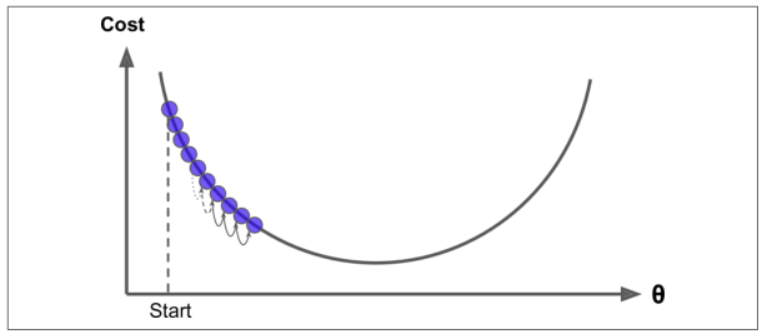

另一方面，如果学习率太高，你可能会跳过山谷并最终在另一边，甚至可能比以前更高。这可能会使算法出现分歧，值越来越大，无法找到一个好的解决方案。
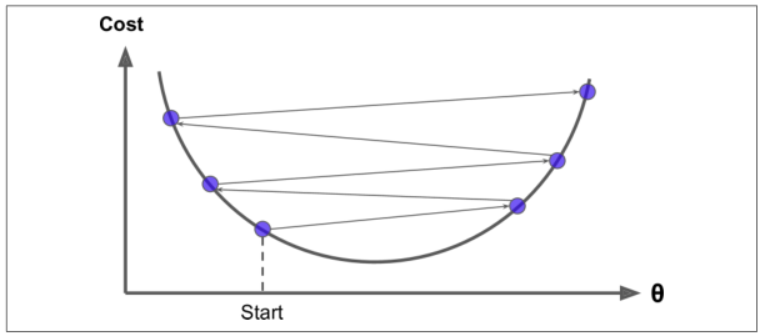

最后，并非所有成本函数看起来都像普通的碗状。可能存在洞，山脊，高原和各种不规则的地形，使收敛到最小值非常困难。 下图显示了Gradient Descent的两个主要挑战：
* 如果随机初始化在左侧启动算法，那么它将收敛到局部最小值，这不如全局最小值。 
* 如果它从右边开始，则需要很长时间才能越过高原，如果你太早停止，你永远不会达到全局最小值。
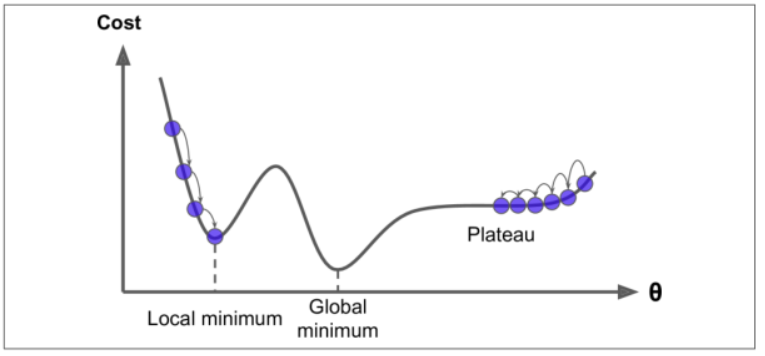

幸好线性回归模型的MSE成本函数恰好是**凸函数**，这意味着：

* 如果您在曲线上选取任意两个点，则连接它们的线段永远不会越过曲线。
* 没有局部最小值，只有一个全局最小值。 它也是一个连续的函数，其斜率永远不会突然变化。

这两个事实有很大的影响：梯度下降保证接近任意**全局最小值**（如果你等待的时间足够长，如果学习率不是太高）。

事实上，成本函数具有碗的形状，但如果特征具有非常不同的尺度，它可以是一个细长的碗。下图显示：
* 特征1和2具有相同的比例（左侧）
* 特征1的值比特征2的值（右侧）小得多
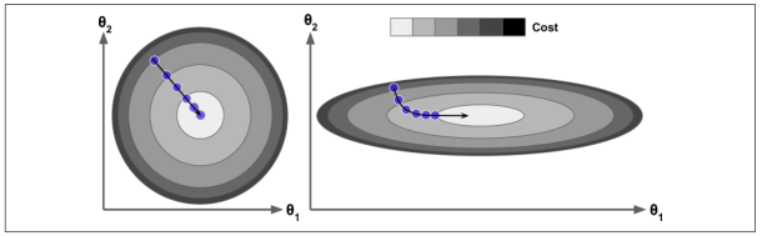

如你看到的：
* 在左侧，梯度下降算法直接向最小值方向移动，从而快速到达它
* 而在右侧，它首先沿着与指向全局最小值的方向几乎正交的方向前进，并以最接近平坦谷的长行程结束。 它最终会达到最低限度，但需要很长时间。

**注意**：使用梯度下降时，应确保所有特征具有相似的比例（例如，使用Scikit-Learn的StandardScaler类），否则收敛时间会更长。

该图还说明了这一事实：训练模型意味着搜索最小化成本函数的模型参数的组合（在训练集上）。

它是模型参数空间中的一个搜索：模型具有的参数越多，该空间的维数越多，搜索越难。 幸运的是，由于在线性回归的情况下，**成本函数是凸的（convex）**，因此解只是在碗的底部。

### 批量梯度下降（Batch Gradient Descent）

要实现梯度下降，您需要根据每个模型参数$θ_j$计算成本函数的梯度。 换句话说，如果稍微更改$θ_j$，则需要计算成本函数的变化量。这被称为**偏导数**。 这就像问“如果我面向东方，我的脚下的山坡是什么？”然后问北面的相同问题（如果可以想象一个超过三维的宇宙，那么所有其他维度都是如此）。
公式4-5计算了关于参数$θ_j$的成本函数的偏导数$\frac{∂}{∂θ_j}MSE(θ)$:
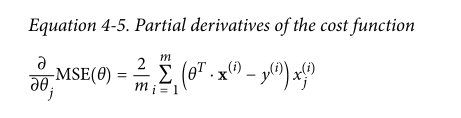

您可以使用公式4-6来代替单独计算这些梯度一口气把它们全都搞定。 **标记为**$∇_θMSE(θ)$的梯度向量**包含成本函数的所有偏导数（每个模型参数一个）**。
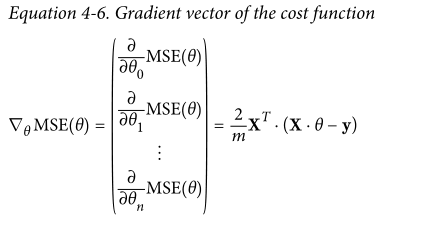

请注意，**此公式涉及在每个Gradient Descent步骤中对完整训练集X的计算**！ 这就是为什么算法被称为**批量梯度下降**：它在每一步使用整批训练数据。 因此，在非常大的训练集上它非常慢（不过我们很快就会看到更快的Gradient Descent算法）。但是，梯度下降与特征数量规模相当; 当使用数十万个特征训练线性回归模型时，梯度下降比the Normal Equation要快得多。

一旦你有了上坡的梯度向量，走向相反的方向就是去下坡。 这意味着从$θ减去∇_θMSE(θ)$。 这是学习速率$η（eta）$发挥作用的地方：将梯度向量乘以$η$以确定下坡步长的大小（公式4-7）。
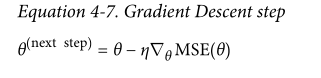

In [9]:
eta=0.1 # learning rate
n_iterations=1000
m=100
theta=np.random.randn(2,1) # random initialization

for interation in range(n_iterations):
    gradients=2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta-eta*gradients

In [10]:
theta

array([[4.21509616],
       [2.77011339]])

In [11]:
X_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

嘿，这正是Normal Equation找到的！梯度下降工作完美。 但是如果你使用了**不同的学习率$η$**怎么办？ 下图显示了使用三种不同学习率的梯度下降的前10个步骤（虚线表示起点）。

In [12]:
theta_path_bgd = []    #保存学习率为0.1的path，后续使用

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000    #iteration表示迭代循环次数
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

Saving figure gradient_descent_plot


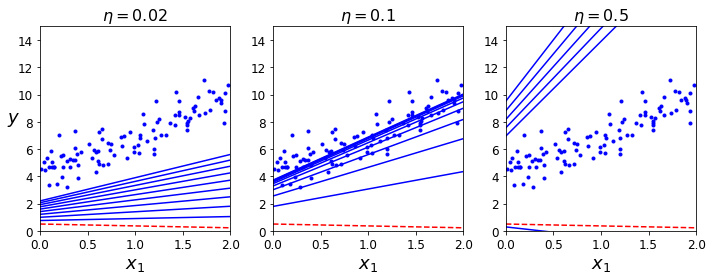

In [13]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

* 在左侧，学习率太低：算法最终会达到解决方案，但需要很长时间。
* 在中间，学习率看起来非常好：在几次迭代中，它已经融合到解决方案中。
* 在右边，学习率太高：算法发散，跳到各处，实际上每一步都越来越远离解决方案。

要找到良好的学习率，您可以使用**网格搜索**。但是，您可能希望限制迭代次数，以便网格搜索能够消除那些需要太久才能收敛的模型。
您可能想知道如何设置迭代次数。如果它太低，当算法停止时你仍然会远离最佳解决方案，但如果它太高，你将浪费时间，而模型参数不再变化。
一个简单的解决方案是设置非常大量的迭代，但是**当梯度向量变得很小时中断算法** ---也就是说，当它的范数变得小于一个微小数量**ε（称为tolerance 公差）**时 ---因为当梯度下降（几乎）达到最小值时会发生这种情况

**收敛速度-Convergence Rate**:

当成本函数是凸的并且其斜率不会突然改变时（就像是MSE成本函数的情况），可以证明，具有固定学习速率的批量梯度下降具有$O(\frac{1}{iterations})$的收敛速度。 换句话说，如果将**公差ε(tolerance)除以10**（以获得更精确的解），则算法必须运行大约10倍的迭代次数。

### 随机梯度下降（Stochastic Gradient Descent）

Batch Gradient Descent的主要问题是它使用整个训练集来计算每一步的梯度，这使得训练集很大时非常慢。在相反的极端，随机梯度下降只是在每一步中在训练集中选择一个随机实例，并仅根据该单个实例计算梯度。显然，这使得算法更快，因为它在每次迭代时都只有很少的数据可操作。它还可以训练大量训练集，因为每次迭代只需要一个实例存储在内存中。

另一方面，由于其随机性质，这种算法比批量梯度下降更不规则：成本函数不会逐渐下降直到达到最小值，而是会反复上下跳动，只是平均下降。随着时间的推移，它将最终接近最小值，但一旦到达那里它就会继续反弹，永不安定下来（见下图）。因此，一旦算法停止，最终参数值是好的，但不是最佳的。
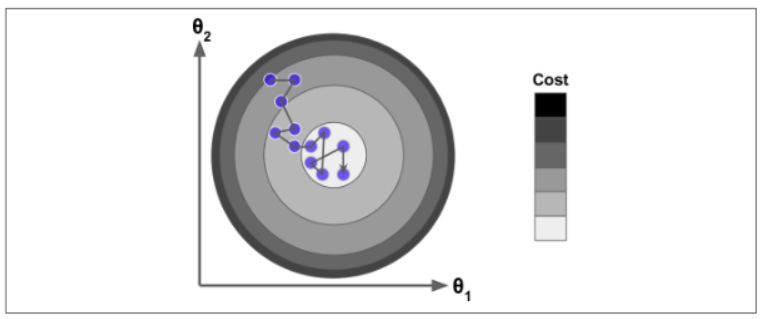

当成本函数非常不规则时（如图4-6所示），这实际上可以帮助算法跳出局部最小值，因此随机梯度下降比批量梯度下降更容易找到全局最小值。因此，随机性有利于摆脱局部最优，但不利的是这意味着算法永远无法到达最低值。这种困境的一个解决方案是**逐渐降低学习率**。步长开始很大（这有助于快速进展并逃避局部最小值），然后变得越来越小，允许算法稳定在全局最小值。这个过程称为**模拟退火**，因为它类似于冶金中的退火过程，其中熔融金属被缓慢冷却。**确定每次迭代学习速率的函数称为学习计划**。
* 如果学习速度降低太快，您可能会陷入局部最低限度，甚至最终冻结到最低限度。
* 如果学习速度降低得太慢，您可能会长时间跳到最小值，如果过早停止训练，最终会得到次优解决方案。

此代码使用简单的学习计划实现随机梯度下降：

In [14]:
theta_path_sgd = []
m = len(X_b)
print(m)
np.random.seed(42)

100


Saving figure sgd_plot


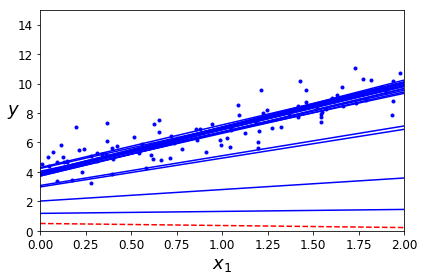

In [15]:
n_epochs=50    #epoch表示迭代循环次数
t0,t1=5,50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0/(t+t1)

theta=np.random.randn(2,1)# randominitialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:               # not shown in the book
            y_predict = X_new_b.dot(theta)      # not shown
            style = "b-" if i > 0 else "r--"    # not shown
            plt.plot(X_new, y_predict, style)   # not shown
        random_index=np.random.randint(m)
        xi=X_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        gradients=2*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(epoch*m+i)
        theta=theta-eta*gradients
        theta_path_sgd.append(theta)                 # not shown
        
plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
save_fig("sgd_plot")                                 # not shown
plt.show()                                           # not shown

上图显示了训练的前10步（注意步骤的不规则程度）。

按照惯例，我们迭代m次(m个实例)循环; 每一轮被称为一个epoch。而Batch Gradient Descent代码在整个过程中迭代了1,000次训练集，此代码仅通过训练集50次，并达到一个相当不错的解决方案：

In [16]:
theta

array([[4.21076011],
       [2.74856079]])

请注意，由于实例是随机挑选的，因此某些实例可能会在每个epoch被挑选几次，而其他实例可能根本不会被挑选。 如果你想确保算法在每个epoch遍历每个实例，可以对训练集进行打乱，然后逐个作为实例训练，然后进行下一次epoch之前，再次将其打乱，以此类推。 然而，这通常会收敛得更慢。

要使用SGD和Scikit-Learn执行线性回归，您可以使用**SGDRegressor**类，默认为优化**平方误差成本函数**。以下代码运行50个epochs，从学习率0.1（eta0 = 0.1）开始，使用默认学习计划（与前一个不同），并且它不使用任何正则化（惩罚=无;后面会有关于此的更多细节）：

In [17]:
from sklearn.linear_model import SGDRegressor

sgd_reg=SGDRegressor(max_iter=50,penalty=None,eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=50,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [18]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4.23166744]), array([2.79099659]))

### 小批量梯度下降（Mini-batch Gradient Descent）

在每一步，不是基于完整的训练集（如在批处理GD中）或仅基于一个实例（如在随机GD中）计算梯度，Mini-batch Gradient Descent在一个小的随机训练集计算梯度。 与Stochastic GD相比，Mini-batch GD的主要优势在于：我们可以通过矩阵操作的硬件优化获得性能提升，尤其是在使用GPU时。


In [19]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [20]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [21]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

Saving figure gradient_descent_paths_plot


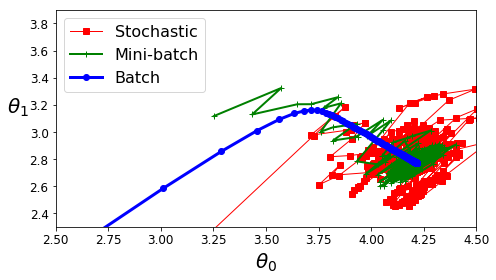

In [22]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()

* 与SGD相比，Mini-batch GD算法在参数空间中的进展相对稳定，特别是batch比较大的时候。 因此，Mini-batch GD将最终比SGD更接近最小值。 

* 但是，另一方面，它可能更难以从局部最小值中逃脱。

上图显示了训练期间三个梯度下降算法在参数空间中所采用的路径。
* 它们都接近最小值，
* 但Batch GD的路径实际上停止在最小值，
* 而SGD和Mini-batch GD继续摆动。

但是，不要忘记Batch GD需要花费大量时间来完成每一步，如果您使用了良好的学习计划，Stochastic GD和Mini-batch GD也将达到最小值。

## 多项式回归（Polynomial Regression）

如果您的数据实际上比简单的直线更复杂怎么办？令人惊讶的是，您实际上可以**使用线性模型来拟合非线性数据**。 一种简单的方法是为每个特征添加权重做为新特征，然后在这组扩展特征上训练线性模型。 这种技术称为**多项式回归**。

我们来看一个例子。 首先，让我们基于一个简单的二次方程生成一些非线性数据（加上一些噪声;见图4-12）：

In [23]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [24]:
m=100
X=6*np.random.rand(m,1)-3
y=0.5*X**2+X+2+np.random.randn(m,1)

Saving figure quadratic_data_plot


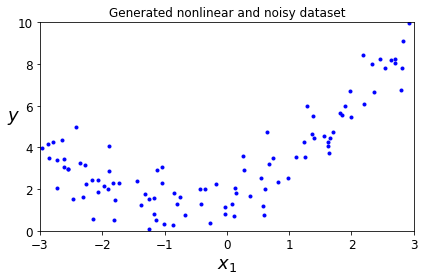

In [25]:
plt.plot(X, y, "b.")
plt.title('Generated nonlinear and noisy dataset')# not shown in the book
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_data_plot")
plt.show()

显然，直线永远不会拟合这些数据。因此，让我们使用Scikit-Learn的Polynomial Features类来转换我们的训练数据，将训练集中**每个特征的平方**（二次多项式）添加为新特征（在这种情况下只有一个特征）：

In [26]:
from sklearn.preprocessing import PolynomialFeatures

poly_features=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [27]:
X_poly[0]    #X[0]和X[0]的平方

array([-0.75275929,  0.56664654])

X_poly现在包含X的原始特征加上此特征的平方。现在，您可以将LinearRegression模型拟合到此扩展训练数据中（图4-13）：

In [28]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

Saving figure quadratic_predictions_plot


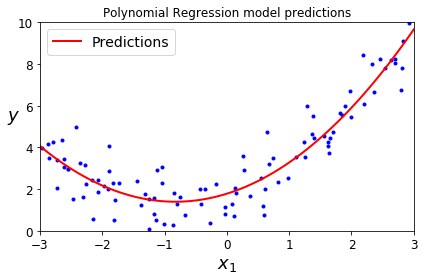

In [29]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.title('Polynomial Regression model predictions') # not shown in the book
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_predictions_plot")
plt.show()

还不错：模型估计的$y_{hat} = 0.56x_1^2+ 0.93x_1 + 1.78$实际上的原始函数是$y = 0.5x_1^2+ 1.0x_1 + 2.0 +高斯噪声$。

请注意，当有多个特征时，多项式回归能够找到特征之间的关系（这是普通线性回归模型无法做到的）。 这是因为PolynomialFeatures还添加了特定次数的所有特征组合。 例如，如果有两个特征a和b，则degree= 3的多项式特征不仅会添加特征$a^2，a^3，b^2和b^3$，还会添加组合$ab，a^2 b和ab^2$

**PolynomialFeatures（degree = d）将包含$n$个特征的数组转换为包含$\frac{(n + d)！}{d！n!}$特征的数组，其中$n！$是$n$的阶乘，等于$1×2×3×⋯×n$。 注意特征数量的组合爆炸！**

## 房价预测

### 波士顿房价预测

In [30]:
from sklearn.datasets import load_boston

# 波士顿房价数据集已经内置在sklearn中
boston_house = load_boston()

boston_feature_name = boston_house.feature_names#数据集中特征的名称
boston_features = boston_house.data#数据集中的特征数据
boston_target = boston_house.target#数据集中的目标值（标签值）

boston_feature_name

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [31]:
# 来看一下对数据集的描述
print(boston_house.DESCR)
'''
有506条数据
13个预测变量
1个结果变量
'''

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

'\n有506条数据\n13个预测变量\n1个结果变量\n'

In [32]:
boston_features[:2,:]#查看一下前两个特征的值

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00]])

In [33]:
boston_target[:10]#看一下目标值的样子

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [34]:
# 进行训练集测试集切分
from sklearn.model_selection import  train_test_split
# 测试集的占比为30%，random_state= 0表示每次切分时，会得到一致的切分。
X_train,X_test,y_train,y_test = train_test_split(boston_features,boston_target,test_size = 0.3,random_state = 0)

In [35]:
#训练数据和测试数据标准化处理
from sklearn.preprocessing import StandardScaler
#分别初始化对特征值和目标值的标准化器
ss_X = StandardScaler()
ss_y = StandardScaler()
#训练数据都是数值型，所以要标准化处理
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)
#目标数据（房价预测值）也是数值型，所以也要标准化处理
#说明一下：fit_transform与transform都要求操作2D数据，而此时的y_train与y_test都是1D的，因此需要调用reshape(-1,1)，例如：[1,2,3]变成[[1],[2],[3]]
y_train = ss_y.fit_transform(y_train.reshape(-1,1))
y_test = ss_y.transform(y_test.reshape(-1,1))

#### 线性回归——正规方程

In [36]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
# 利用测试数据进行预测
y_pred = lin_reg.predict(X_test)

In [38]:
from sklearn.metrics import mean_squared_error

In [39]:
error = np.sqrt(mean_squared_error(y_test,y_pred))
error

0.5664286424765868

#### 线性回归——随机梯度下降

In [40]:
from sklearn.linear_model import SGDRegressor
#得到一致的结果
np.random.seed(42)
sgdr = SGDRegressor()
sgdr.fit(X_train,y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [41]:
# 利用测试数据进行预测
y_pred = sgdr.predict(X_test)

In [42]:
error = np.sqrt(mean_squared_error(y_test,y_pred))
error

0.5883769453447524

### 加利福尼亚州房价预测 //作业？

加载加利福尼亚州房价数据集，并分为训练集和测试集

In [43]:
DATASETS_PATH = os.path.join(PROJECT_ROOT_DIR, "datasets")
print(DATASETS_PATH)

/home/ds/notebooks/Linear_Regression_house_price/datasets


In [44]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#housing = fetch_california_housing()
housing = fetch_california_housing(data_home=DATASETS_PATH,download_if_missing=False)


#X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
#X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

# 进行训练集测试集切分
# 测试集的占比为30%，random_state= 0表示每次切分时，会得到一致的切分。
X_train,X_test,y_train,y_test = train_test_split(housing.data,housing.target,test_size = 0.3,random_state = 0)

#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_valid = scaler.transform(X_valid)
#X_test = scaler.transform(X_test)

In [45]:
#训练数据和测试数据标准化处理
#分别初始化对特征值和目标值的标准化器
ss_X = StandardScaler()
ss_y = StandardScaler()
#训练数据都是数值型，所以要标准化处理
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)
#目标数据（房价预测值）也是数值型，所以也要标准化处理
#说明一下：fit_transform与transform都要求操作2D数据，而此时的y_train与y_test都是1D的，因此需要调用reshape(-1,1)，例如：[1,2,3]变成[[1],[2],[3]]
y_train = ss_y.fit_transform(y_train.reshape(-1,1))
y_test = ss_y.transform(y_test.reshape(-1,1))

In [46]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [47]:
X_train.shape

(14448, 8)

#### 线性回归——正规方程

In [48]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.638849627697872

#### 线性回归——随机梯度下降

In [50]:
from sklearn.linear_model import SGDRegressor
#得到一致的结果
np.random.seed(42)
sgdr = SGDRegressor()
sgdr.fit(X_train,y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [51]:
# 利用测试数据进行预测
y_pred = sgdr.predict(X_test)

In [52]:
housing_predictions = sgdr.predict(X_test)
sgdr_mse = mean_squared_error(y_test, housing_predictions)
sgdr_rmse = np.sqrt(sgdr_mse)
sgdr_rmse

2.105656157391028